Installing the PRAW package



!pip install praw

# Authentication

In [1]:
import praw 

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="DcyXG2z-Ud3hSjn9xeAqrg",
    client_secret="h9BdnESVlkGpi33zxqdtnJPZ1qhS6A",
    user_agent=user_agent
)

In [2]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# Get Trending Topic from your Subreddit

In [3]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("tesla").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

r/TeslaMotors is the subreddit you're looking for
15qiyhk
dalkon
1691983573.0
22
0.87
https://www.reddit.com/r/teslamotors
0


#Get total comment in Subreddit

In [21]:
headlines = set()
for submission in reddit.subreddit("tesla").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

28


In [22]:
#Create a dataframe from the scrapped data 
df = pd.DataFrame(headlines)
df.head()

,0
0,Waterfall fountain 1913 Nikola Tesla US1113716...
1,John T Williams electro-port: linear motor mai...
2,Tesla Tower in Red Dead Redemption 2
3,Tubular linear motor mail transport 1886 Port ...
4,Portrait of Nikola Tesla made up of electrical...


In [23]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [24]:
df.columns = ['Titles']

In [25]:
df.head()

,Titles
0,Waterfall fountain 1913 Nikola Tesla US1113716...
1,John T Williams electro-port: linear motor mai...
2,Tesla Tower in Red Dead Redemption 2
3,Tubular linear motor mail transport 1886 Port ...
4,Portrait of Nikola Tesla made up of electrical...


In [26]:
df.Titles.duplicated().sum() 

0

REDDIT APP DATA PREPROCESSING


In [27]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)



In [28]:
#Show the cleandf.head()
df.head()

,Titles
0,Waterfall fountain 1913 Nikola Tesla US1113716...
1,John T Williams electro-port linear motor mail...
2,Tesla Tower in Red Dead Redemption 2
3,Tubular linear motor mail transport 1886 Port ...
4,Portrait of Nikola Tesla made up of electrical...


In [36]:

#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles,Subjectivity,Polarity,Insight
0,Waterfall fountain 1913 Nikola Tesla US1113716...,0.433333,-0.05,Negative
1,John T Williams electro-port linear motor mail...,0.000000,0.00,Neutral
2,Tesla Tower in Red Dead Redemption 2,0.200000,-0.10,Negative
3,Tubular linear motor mail transport 1886 Port ...,0.000000,0.00,Neutral
4,Portrait of Nikola Tesla made up of electrical...,0.000000,0.00,Neutral


TEXT ANALYSIS AND VISUALISATION FOR TEXTBLOB 



In [37]:
!pip install textblob

In [39]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [40]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)

#Now display data
df.head()

,Titles,Subjectivity,Polarity,Insight
0,Waterfall fountain 1913 Nikola Tesla US1113716...,0.433333,-0.05,Negative
1,John T Williams electro-port linear motor mail...,0.000000,0.00,Neutral
2,Tesla Tower in Red Dead Redemption 2,0.200000,-0.10,Negative
3,Tubular linear motor mail transport 1886 Port ...,0.000000,0.00,Neutral
4,Portrait of Nikola Tesla made up of electrical...,0.000000,0.00,Neutral


CATEGORIZING BITCOIN SENTIMENT



In [31]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Waterfall fountain 1913 Nikola Tesla US1113716...,0.433333,-0.050000,Negative
1,John T Williams electro-port linear motor mail...,0.000000,0.000000,Neutral
2,Tesla Tower in Red Dead Redemption 2,0.200000,-0.100000,Negative
3,Tubular linear motor mail transport 1886 Port ...,0.000000,0.000000,Neutral
4,Portrait of Nikola Tesla made up of electrical...,0.000000,0.000000,Neutral
5,Corona discharge capacitors 1943 Thomas Henry ...,0.000000,0.000000,Neutral
6,Integza’s Building Nikola Tesla's Bladeless Tu...,0.000000,0.000000,Neutral
7,Bruce Perreault - Converting Cosmic Rays to El...,0.000000,0.000000,Neutral
8,High frequency atmospheric electrostatic energ...,0.397091,0.097455,Positive
9,r/TeslaMotors is the subreddit you're looking for,0.000000,0.000000,Neutral


# Data Visualization

In [41]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [42]:
df.head()

,Titles,Subjectivity,Polarity,Insight
0,Waterfall fountain 1913 Nikola Tesla US1113716...,0.433333,-0.05,Negative
1,John T Williams electro-port linear motor mail...,0.000000,0.00,Neutral
2,Tesla Tower in Red Dead Redemption 2,0.200000,-0.10,Negative
3,Tubular linear motor mail transport 1886 Port ...,0.000000,0.00,Neutral
4,Portrait of Nikola Tesla made up of electrical...,0.000000,0.00,Neutral


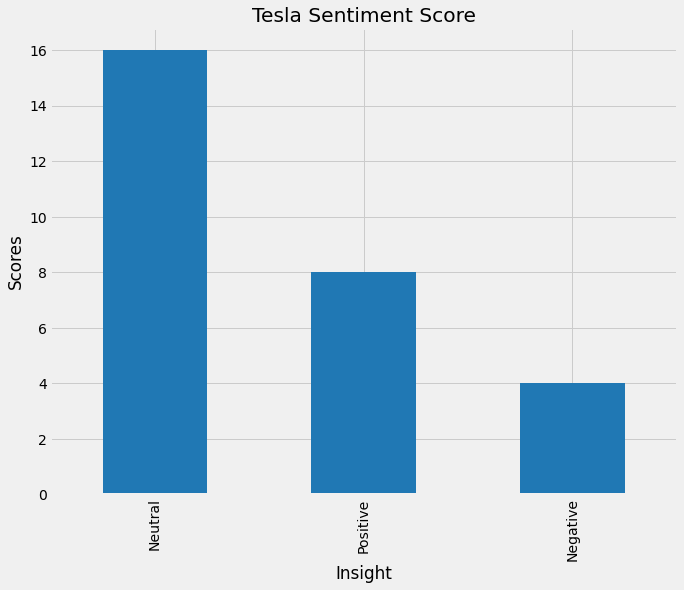

In [35]:
#Plot the values count of sentiment
plt.title("Tesla Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

Word Cloud


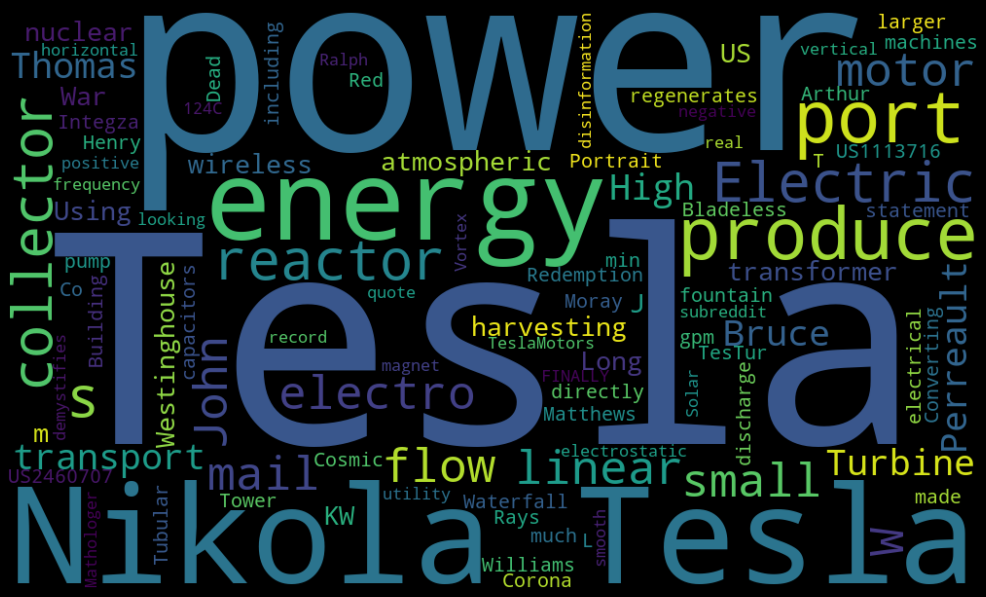

In [43]:
text = ' '.join( [twts for twts in df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
